Convolutional Neural Network for CIFAR-10 dataset image classification:
* ### 1- Import libraries
* ### 2- Load dataset
  - shape of dataset
  - Output classes
  - Visualization of input data
* ### 3- Simple CNN model (First implementation)
  - CNN model
    - Building the model
    - Training (learning)
  - Evaluation
    - Accuracy of training data
    - Accuracy of test data
* ### 4- Second CNN implementation
  - Normalization
  - New visualization
  - Data Augmentation
  - Xavier initialization
  - CNN model
  - Evaluation
* ### 5- Prediction
* ### 6- Import ResNet50
  - Transfer Learning
  - Evaluation

# 1- Import libraries

In [ ]:
import numpy as np                                
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import datasets
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from random import randint

from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.preprocessing import image
from PIL import Image
import cv2

# 2- Load dataset

from datasets of keras, we load cifar10 images dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


## - Information of dataset

In [ ]:
print("trining X shape:" + str(X_train.shape))
print("trining y shape:" + str(y_train.shape))

print("testing X shape:" + str(X_test.shape))
print("trining y shape:" + str(y_test.shape))

trining X shape:(50000, 32, 32, 3)
trining y shape:(50000, 1)
testing X shape:(10000, 32, 32, 3)
trining y shape:(10000, 1)


## - Output classes

In [ ]:
num_classes=10
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## - Data visualization befor processing




Showing one random image among the training set

In [1]:
img = randint(0, 50000)
plt.imshow(X_train[img])
plt.show()

NameError: ignored

# 3- CNN model (raw implementation)

Based on the VGG and without any additional process (Batch Normalization, Augmentation), we implement the model

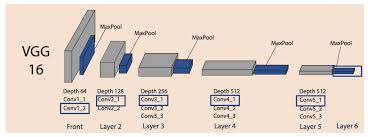

## - Build model

In [ ]:
# Input size:
img_rows = 32
img_cols = 32
channels = 3

# Regularization:
reg=None

# Initial number of filters: 
num_filters=32

# Activation function:
ac='relu'

# Optimizer (Adam)
adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt=adm

# Deop-out:
drop_dense=0.5
drop_conv=0


model = Sequential()

model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg, input_shape=(img_rows, img_cols, channels),padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg,padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(512, activation=ac,kernel_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Number of parameters:

In [4]:
model.summary()

NameError: ignored

### Summary of model precedure:

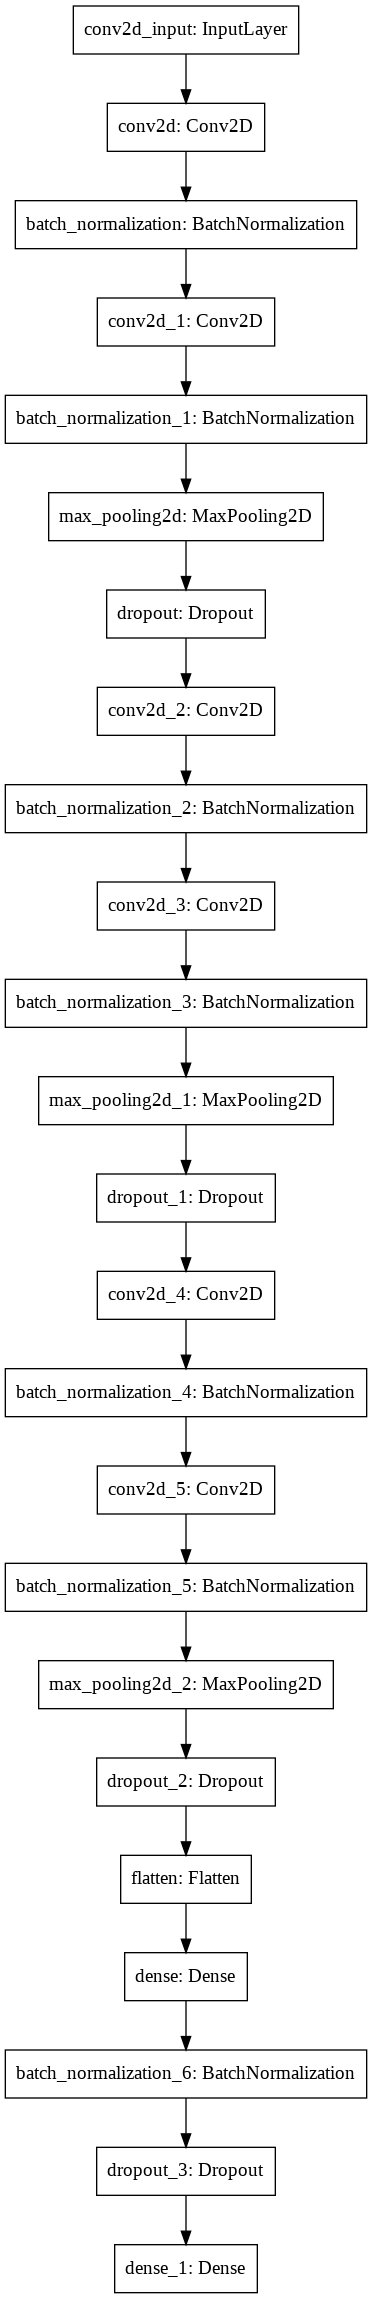

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png")

## - Train model

**Batch size: 128, Epochs: 100**

In [ ]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
391/391 [==============================] - 17s 37ms/step - loss: 1.5035 - accuracy: 0.5122 - val_loss: 1.3294 - val_accuracy: 0.5573
Epoch 2/100
391/391 [==============================] - 14s 35ms/step - loss: 0.9139 - accuracy: 0.6845 - val_loss: 0.9305 - val_accuracy: 0.6830
Epoch 3/100
391/391 [==============================] - 14s 35ms/step - loss: 0.6982 - accuracy: 0.7582 - val_loss: 0.8087 - val_accuracy: 0.7243
Epoch 4/100
391/391 [==============================] - 14s 35ms/step - loss: 0.5702 - accuracy: 0.8008 - val_loss: 0.7081 - val_accuracy: 0.7574
Epoch 5/100
391/391 [==============================] - 14s 35ms/step - loss: 0.4745 - accuracy: 0.8359 - val_loss: 0.7023 - val_accuracy: 0.7678
Epoch 6/100
391/391 [==============================] - 14s 35ms/step - loss: 0.3993 - accuracy: 0.8607 - val_loss: 0.6951 - val_accuracy: 0.7757
Epoch 7/100
391/391 [==============================] - 14s 35ms/step - loss: 0.3280 - accuracy: 0.8840 - val_loss: 0.7011 - val_ac

## - Training accuracy

In [ ]:
train_acc = model.evaluate(X_train,y_train,batch_size=128)
train_acc

391/391 [==============================] - 5s 12ms/step - loss: 0.0071 - accuracy: 0.9976


[0.007067644037306309, 0.9976000189781189]

## - Test accuracy

In [ ]:
test_acc = model.evaluate(X_test, y_test, batch_size=128)
test_acc

79/79 [==============================] - 1s 11ms/step - loss: 1.3446 - accuracy: 0.8182


[1.3445707559585571, 0.8181999921798706]

# Evaluation

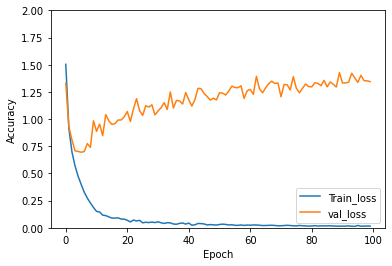

In [ ]:
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 2])
plt.legend(loc='lower right')

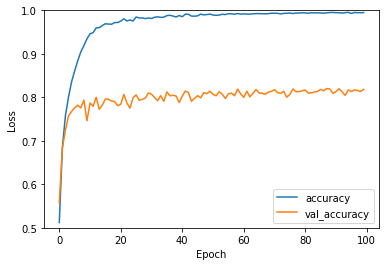

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# 4- Second implementation

#### In this implementation, we use "**Data Augmentation**", "**Data Normalization**", "**Regularization**" and finally apply "**Parameter initialization**"



## - Normalizing input

1- convert images into float type (for deviding over 255)\
2- compute mean of data\
3- standard deviation\
4- normalization

In [ ]:
# convert to float
X_train = X_train.astype("float32")  
X_test = X_test.astype("float32")

# compute mean
mean = np.mean(X_train)

# standard deviation
std = np.std(X_train)

# normalization
X_test = (X_test-mean)/std
X_train=(X_train-mean)/std

## -  Data visualization after Normalization

Let's see the normalized image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


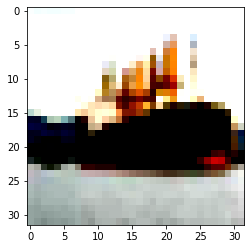

In [ ]:
plt.imshow(X_train[img])
plt.show()

## - Augmentation set up

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 25,          # rotating image with 25 degree 
    shear_range = 0.2,            # Shear angle
    horizontal_flip = True,       # Horizontal flipping
    width_shift_range = 0.2,      # width shift
    height_shift_range = 0.2,     # hight shift
    zoom_range = 0.1              # zoom >> [1-0.1, 1+0.1]
    )
datagen.fit(X_train)

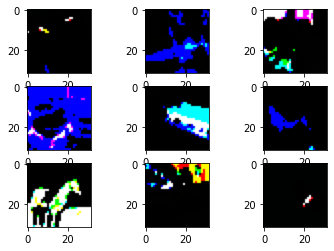

In [ ]:
# some data visualization after Augmentation
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

# - CNN model

implemetn the same model except the "Regularization" parameters

In [ ]:
# L2 or "ridge" regularisation:
reg2=l2(1e-4)     

num_filters2=32
ac2='relu'
adm2=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.2
drop_conv2=0.1

# Define Xavier initialization method:
initializer = tf.keras.initializers.GlorotNormal()


model2 = Sequential()

model2.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Flatten())
model2.add(Dense(512, activation=ac2,kernel_regularizer=reg2,kernel_initializer=initializer))   # Add Xavier initialization to the Dense layer
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense2))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## - Train model with "Data Augmentation"

In [ ]:
history2=model2.fit_generator(datagen.flow(X_train, y_train, batch_size=128),steps_per_epoch = len(X_train) / 128, epochs=100, validation_data=(X_test, y_test))


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
390/390 [==============================] - 72s 112ms/step - loss: 1.8216 - accuracy: 0.4122 - val_loss: 1.5218 - val_accuracy: 0.4940
Epoch 2/100
390/390 [==============================] - 44s 112ms/step - loss: 1.4223 - accuracy: 0.5357 - val_loss: 1.5528 - val_accuracy: 0.5648
Epoch 3/100
390/390 [==============================] - 44s 112ms/step - loss: 1.2359 - accuracy: 0.6065 - val_loss: 1.1561 - val_accuracy: 0.6557
Epoch 4/100
390/390 [==============================] - 43s 111ms/step - loss: 1.1200 - accuracy: 0.6526 - val_loss: 1.0312 - val_accuracy: 0.6990
Epoch 5/100
390/390 [==============================] - 44s 111ms/step - loss: 1.0422 - accuracy: 0.6815 - val_loss: 1.0215 - val_accuracy: 0.7036
Epoch 6/100
390/390 [==============================] - 43s 110ms/step - loss: 0.9846 - accuracy: 0.7056 - val_loss: 0.9153 - val_accuracy: 0.7337
Epoch 7/100
390/390 [==============================] - 43s 110ms/step - loss: 0.9417 - accuracy: 0.7251 - val_loss: 0.8664 -

## - Training accuracy

In [ ]:
model2_test_acc=model2.evaluate(X_test,y_test,batch_size=128)
model2_test_acc

79/79 [==============================] - 1s 15ms/step - loss: 0.6127 - accuracy: 0.8716


[0.6126645803451538, 0.8715999722480774]

## - Test accuracy

In [ ]:
model2_train_acc=model2.evaluate(X_train,y_train,batch_size=128)
model2_train_acc

391/391 [==============================] - 5s 13ms/step - loss: 0.4914 - accuracy: 0.9090


[0.4914296865463257, 0.9089800119400024]

# Evaluation

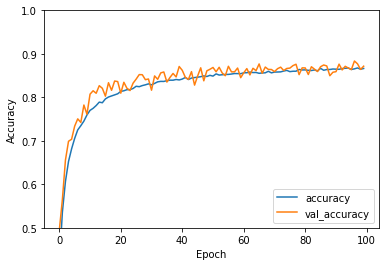

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

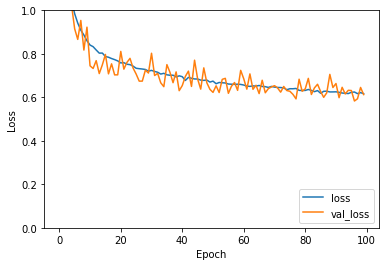

In [ ]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# 5-Prediction

### select a random image among test set and predict its class

In [ ]:
image = randint(0,10000)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


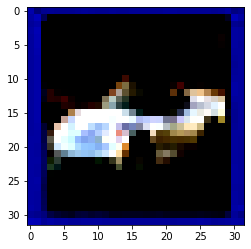

In [ ]:
y_pred = model2.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
plt.imshow(X_train[image])
plt.show()

In [ ]:
classes[y_classes[image]]

'bird'

## Define callback

In [ ]:
  # Adding callbacks.
from keras import callbacks

callbacks = [
             callbacks.EarlyStopping(monitor='acc', patience=3, restore_best_weights=True),
             callbacks.TerminateOnNaN()
            ]

# 6-Import Resnet50 and pre-trained weights

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

## Transfer learning
### changing the classifying part to fit our dataset

In [ ]:
model = models.Sequential()
model.add(conv_base)            # import and use ResNet50 model
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=opt2, loss='categorical_crossentropy', metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 2048)              8192      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

### Training model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=256, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
196/196 [==============================] - 57s 239ms/step - loss: 1.5754 - acc: 0.4321 - val_loss: 6.3859 - val_acc: 0.1000
Epoch 2/100
196/196 [==============================] - 43s 220ms/step - loss: 1.0228 - acc: 0.6501 - val_loss: 2.7085 - val_acc: 0.1743
Epoch 3/100
196/196 [==============================] - 43s 220ms/step - loss: 0.8052 - acc: 0.7338 - val_loss: 2.1741 - val_acc: 0.3710
Epoch 4/100
196/196 [==============================] - 43s 220ms/step - loss: 0.6674 - acc: 0.7814 - val_loss: 0.9289 - val_acc: 0.7101
Epoch 5/100
196/196 [==============================] - 43s 220ms/step - loss: 0.5630 - acc: 0.8161 - val_loss: 0.9335 - val_acc: 0.7095
Epoch 6/100
196/196 [==============================] - 43s 220ms/step - loss: 0.4771 - acc: 0.8449 - val_loss: 0.8033 - val_acc: 0.7516
Epoch 7/100
196/196 [==============================] - 43s 220ms/step - loss: 0.3990 - acc: 0.8733 - val_loss: 0.8277 - val_acc: 0.7625
Epoch 8/100
196/196 [===========================

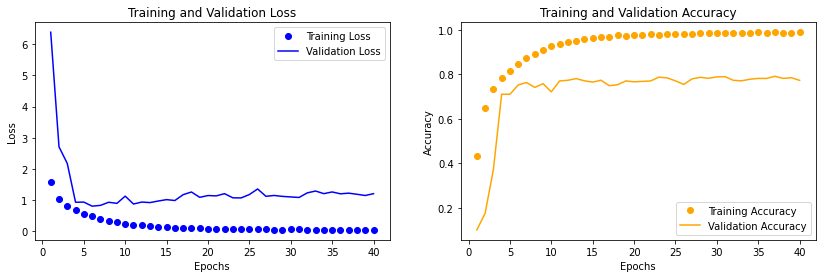

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'bo', label='Training Accuracy', c='orange')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy', c='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
